In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import mlab

In [2]:
%matplotlib inline
plt.style.use('fivethirtyeight')

# Load data

In [3]:
"""
- These charts focus on real-world data concerning
the Appstore

- For further details about the data see this American
Economic Review article: https://www.aeaweb.org/articles?id=10.1257/aer.104.5.255 

- Data are contained in the compressed folder *.zip
"""

df = pd.read_csv('killerAps/data.csv')

In [5]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 68 columns):
cat1             36349 non-null int64
cat2             36349 non-null int64
cat3             36349 non-null int64
cat4             36349 non-null int64
cat5             36349 non-null int64
cat6             36349 non-null int64
cat7             36349 non-null int64
cat8             36349 non-null int64
cat9             36349 non-null int64
cat10            36349 non-null int64
cat11            36349 non-null int64
cat12            36349 non-null int64
cat13            36349 non-null int64
cat14            36349 non-null int64
cat15            36349 non-null int64
cat16            36349 non-null int64
cat17            36349 non-null int64
cat18            36349 non-null int64
cat              36349 non-null int64
killerappgros    36349 non-null int64
numcomapp        36349 non-null float64
scoreapp         36349 non-null float64
avprice          36349 non-null float64
avsize     

In [6]:
cb = pd.read_csv('killerAps/codebook.csv')

In [7]:
cb

,variable name,type,format,variable label
0,cat1,byte,%8.0g,categoryname==Business
1,cat2,byte,%8.0g,categoryname==Education
2,cat3,byte,%8.0g,categoryname==Entertainment
3,cat4,byte,%8.0g,categoryname==Finance
4,cat5,byte,%8.0g,categoryname==Games
5,cat6,byte,%8.0g,categoryname==Health
6,cat7,byte,%8.0g,categoryname==Lifestyle
7,cat8,byte,%8.0g,categoryname==Medical
8,cat9,byte,%8.0g,categoryname==Music
9,cat10,byte,%8.0g,categoryname==Navigation


# Frequencies

## Data transformation

### Freqs with respect to categories

In [7]:
df.loc[:, 'count'] = 1

In [5]:
df.head(1)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cohort32,cohort33,cohort34,cohort35,cohort36,cohort37,cohort38,noupdates,avdeltatime,lnnumcomapp
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0.0,4.41884


In [9]:
gr = df.groupby('cat', as_index=False)['count']
fr = pd.DataFrame(gr.aggregate(np.sum))

In [10]:
fr

,cat,count
0,1,1596
1,2,3846
2,3,4915
3,4,376
4,5,7683
5,6,1316
6,7,3216
7,8,542
8,9,1568
9,10,799


In [11]:
# set of category names
c = ('Business', 'Education', 'Entertainment', 'Finance', 'Games', 'Health',
     'Lifestyle', 'Medical', 'Music', 'Navigation', 'Photography',
     'Productivity', 'Reference', 'Social Networking', 'Sports', 'Travel',
     'Utilities', 'Weather')

# positions for category
c_pos = fr.index

# data to plot
f = fr['count']

In [15]:
labels = ['a', 'b', 'c']
positions = [0, 1, 2]

In [16]:
dict(zip(labels, positions))

{'a': 0, 'b': 1, 'c': 2}

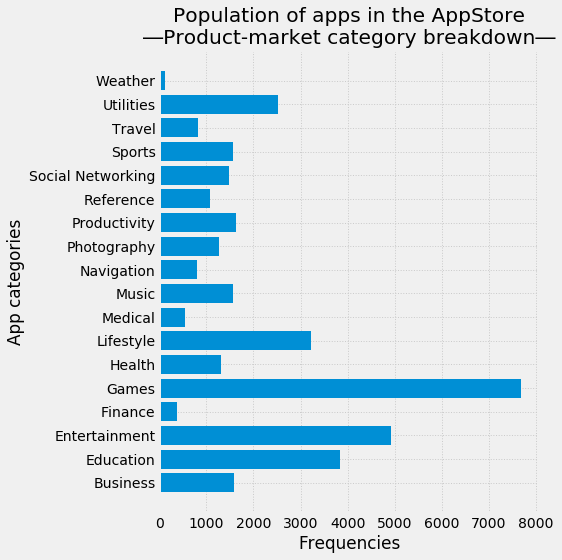

In [12]:
# creating the figure
fig = plt.figure(figsize=(8, 8))

# populate the figure with a plot
ax = fig.add_subplot(1, 1, 1)

# plot the data
ax.barh(c_pos, f)

# axes
ax.set_yticks(c_pos)
ax.set_yticklabels(c)

# gridline
ax.grid()

# labels
ax.set_xlabel("Frequencies")
ax.set_ylabel("App categories")

# title
ax.set_title(
    "Population of apps in the AppStore\n―Product-market category breakdown―")

# annotations
# ax.annotate("A simple comment", xy = (1, 90))

# tight layout
fig.tight_layout()

# save the figure
fig.savefig("tight_layout.pdf")

# display the figure
plt.show()

# close the FIG object
plt.close(fig)

### Freqs with respect to categories & popularity (killer app or not) 

In [13]:
df.loc[:, 'count'] = 1

In [14]:
gr = df.groupby(['cat', 'killerappgros'], as_index=False)['count']
fr = pd.DataFrame(gr.aggregate(np.sum))

In [15]:
fr.head()

,cat,killerappgros,count
0,1,0,1572
1,1,1,24
2,2,0,3777
3,2,1,69
4,3,0,4752


In [16]:
# creating the variables to plot
select = ((fr['cat'] == 9) | (fr['cat'] == 11)) & (fr['killerappgros'] == 1)
killer = fr.loc[select, 'count']

In [17]:
# creating the variables to plot
select = ((fr['cat'] == 9) | (fr['cat'] == 11)) & (fr['killerappgros'] == 0)
non_killer = fr.loc[select, 'count']

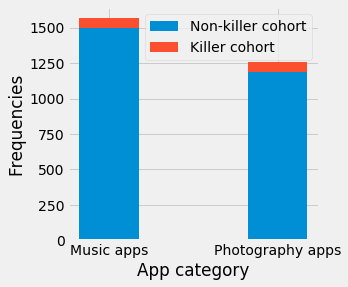

In [27]:
# params for the visualization
c_n = 2
c_pos = np.arange(c_n)    # the x locations for the groups
width = 0.35              # the width of the bars: can also be len(x) sequence

# creating framework for the figure
fig = plt.figure(figsize=(4, 4))

# populate the figure
ax = fig.add_subplot(1, 1, 1)

# plot the data
ax.bar(c_pos, non_killer, width, label='Non-killer cohort')
ax.bar(c_pos, killer, width, bottom=non_killer,  label='Killer cohort')

# axes labels
ax.set_xlabel('App category')
ax.set_ylabel('Frequencies')

# axes ticks
ax.set_xticks((0, 1))
ax.set_xticklabels(('Music apps', 'Photography apps'))

# legend
ax.legend(loc='best')

plt.show()

# Univariate distributions

## Boxplots

In [19]:
# data series
x = df.numcomapp

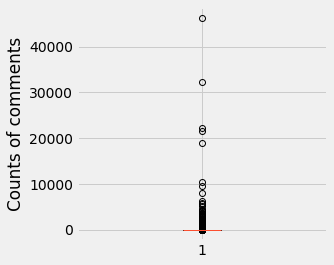

In [20]:
# figure
fig = plt.figure(figsize=(4, 4))

# plot
ax = fig.add_subplot(111)

# plot the data
ax.boxplot(x)

# xtick labels
# ax.set_xticklabels('Average price')

# labels
ax.set_ylabel('Counts of comments')

# axhline
# ax.axhline(y = 10, color = 'orange')

# display the plot
plt.show()

# close the figure
plt.close(fig)

## Histograms

In [21]:
# data series
x = df.numcomapp

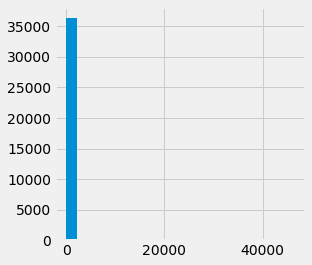

In [22]:
# creating a new figure
fig = plt.figure(figsize=(4, 4))

# populate the figure with a plot
ax = fig.add_subplot(1, 1, 1)

# plot the data
ax.hist(x, bins=20)

# display the plot
plt.show()

# close the figure
plt.close(fig)

## Log-log plots

In [23]:
# data preparation
gr = df.groupby('numcomapp', as_index=False)['count']
ll = gr.aggregate(np.sum)
ll.loc[:, 'pr'] = ll['count'] / np.sum(ll['count']) 
ll.loc[:, 'numcomapp'] = ll['numcomapp'] + 1

In [24]:
ll.head()

,numcomapp,count,pr
0,1.0,17293,0.475749
1,2.0,4288,0.117967
2,3.0,3599,0.099012
3,4.0,1633,0.044926
4,5.0,1826,0.050235


In [25]:
# create data series
x = ll['numcomapp']
y = ll['pr']

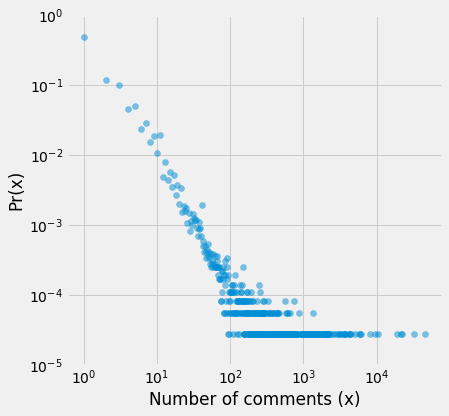

In [28]:
'''
The distribution of 'comments' in the Appstore is so skewed that 
neither the boxplot nor the histogram can reveal any meaningful 
pattern. The log-log plot is particularly suited to deal with 
phenomena that follows a powerlaw distribution (in the context of
SMM638, we will frequently ecnounter this distribution).

Baiscally, the log-log plot has two distinctive features:

- the x-axis is log-transformed (this helps to appreciate the 
  range of variability of the variable under investigation)
- the y-axis reports probability scores (i.e., the chance that a 
  unit randomly selected from the population will present the value 𝑥̂ 

)
'''

# cretae the chart
fig = plt.figure(figsize=(6, 6))

# populate the figure
ax = fig.add_subplot(1, 1, 1)

# plot the data
ax.scatter(x, y, marker='o', alpha=0.5)

# axes
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(0.00001, 1)
ax.set_xlabel('Number of comments (x)')
ax.set_ylabel('Pr(x)')

# show the plot
plt.show()